# gridded_data_tutorial
## Notebook 3
Waterhackweek 2020
Steven Pestana (spestana@uw.edu)
***

### Study Case:

We want to look at precipitation data from DayMet for the Yakima watershed.

Also, I'm interested in snow too, so we'll look at that too.

### Research question:

Have the seasonal and inter-annual patterns of precipitation (and snow accumulaiton) in the Yakima watershed changed in recent years?

### Where is the Yakima watershed?

map figure

---
## Geospatial Raster Data and NetCDFs

Raster data is stored as a grid of values (hence it is also called "gridded" data). These can be visualized as pixels in a 2-dimensional image, where the color or brightness of each pixel represents the data value. 

Geospatial raster data represents scalar or categorical data distributed across Earth's surface, such as topography or land-use/landcover map. To make a raster "geospatial" it needs metadata that relates each pixel to a location on Earth's surface. **Coordinate reference systems** (CRS) specify the datum, projection, and other information to translate the raster pixel coordinates to locations on Earth. More details on coordinate reference systems can be found [here](https://datacarpentry.org/organization-geospatial/03-crs/index.html).

*raster example figures for scalar or categorical data*

Examples of raster data formats:
* geotiff ...
* HDF ...
* GRIB ...
* NetCDF ...

File formats such as [NetCDF](https://www.unidata.ucar.edu/software/netcdf/docs/) combine multi-dimensional data sets along with their metadata in a single file. 

---
## What is DayMet?

</br></br>

<div align="left" style="display:inline-block;float:left;width:50%;">

* introduction to the dataset we'll be using...
* coverage: North America, Hawaii, Puerto Rico
* Data is hosted by the [Oak Ridge National Lab DAAC](https://daymet.ornl.gov/)

**Daymet: Daily Surface Weather Data on a 1-km Grid for North America, Version 3**
* [User Guide](https://daac.ornl.gov/DAYMET/guides/Daymet_V3_CFMosaics.html)
* [Recent article about Daymet](https://earthdata.nasa.gov/learn/articles/daymet-and-daymet-2019-data)
* ...



</div>



<div align="right" style="display:inline-block;float:right;width:50%;">

<img src="https://cdn.earthdata.nasa.gov/conduit/upload/14259/DEM_HorizonFiles_2010stns_crop-resize_continent-only.jpg" style="height:300px;align:center;">

</div>

### How can we access this data? 

using [OPeNDAP](https://en.wikipedia.org/wiki/OPeNDAP) (Open-source Project for a Network Data Access Protocol)

* show how to search and select DayMet data using the OPeNDAP endpoint

https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1328

https://thredds.daac.ornl.gov/thredds-daymet/dodsC/daymet-v3-agg/na.ncml.html

https://thredds.daac.ornl.gov/thredds-daymet/catalog/daymet-v3-agg/catalog.html?dataset=daymet-v3-agg/na.ncml

https://thredds.daac.ornl.gov/thredds-daymet/catalog/daymet-v3-agg/catalog.html

In [1]:
import xarray as xr

OPeNDAP endpoints for DayMet:

what data can we get and how do we select it?

In [2]:
ds = xr.open_dataset("https://thredds.daac.ornl.gov/thredds-daymet/dodsC/daymet-v3-agg/na.ncml")

What did we just open with xarray? Look at the dataset's structure and metadata:

We have *Dimensions* of **time**, **x**, and **y**; *Coordinates* of **time**, **x**, **y**, **lat**, and **lon**.



In [3]:
ds

<xarray.Dataset>
Dimensions:                  (nv: 2, time: 14600, x: 7814, y: 8075)
Coordinates:
  * x                        (x) float32 -4560250.0 -4559250.0 ... 3252750.0
  * y                        (y) float32 4984000.0 4983000.0 ... -3090000.0
  * time                     (time) datetime64[ns] 1980-01-01 ... 2019-12-31
    lat                      (y, x) float32 ...
    lon                      (y, x) float32 ...
Dimensions without coordinates: nv
Data variables:
    lambert_conformal_conic  int16 ...
    yearday                  (time) int16 ...
    time_bnds                (time, nv) datetime64[ns] ...
    dayl                     (time, y, x) float32 ...
    prcp                     (time, y, x) float32 ...
    srad                     (time, y, x) float32 ...
    swe                      (time, y, x) float32 ...
    tmax                     (time, y, x) float32 ...
    tmin                     (time, y, x) float32 ...
    vp                       (time, y, x) float32 ...
Att

### Data selecting/slicing/indexing methods

* define some lat/lon bounding boxes
* define some time bounds

To select a smaller area to work with, we can use the [*xarray.Dataset.isel*](https://xarray.pydata.org/en/stable/generated/xarray.Dataset.isel.html) method. 

In [82]:
testdata_srad = ds.srad.isel(time=100, x=slice(2700,3500), y=slice(4000,4600))

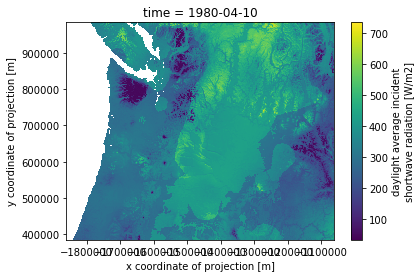

In [83]:
testdata_srad.plot()

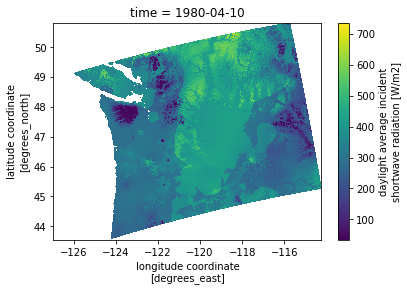

In [84]:
testdata_srad.plot(x='lon', y='lat')

In [7]:
import numpy as np

In [69]:
# point
lat = 41.22
lon = -112.68

# First, find the index of the grid point nearest a specific lat/lon.   
abslat = np.abs(ds.lat-lat)
abslon = np.abs(ds.lon-lon)
c = np.maximum(abslon, abslat)

([xloc], [yloc]) = np.where(c == np.min(c))

In [76]:
point_ds = ds.sel(x=int(xloc), y=int(yloc))

KeyError: 5043.0

In [ ]:
# yay! we now know how to access this data source

Look at the metadata of what DayMet gives us

* introducing some new stuff using xarray

In [ ]:
# yay! we now know what the data structure is and what the metadata tells us

Try making some plots with this data now showing xarray plotting functions, cartopy

In [ ]:
# yay! we made some plots

Next section we'll use ulmo, xarray to answer our **research question**